# Chuẩn hóa cơ sở dữ liệu – Chuẩn thứ ba (3NF)


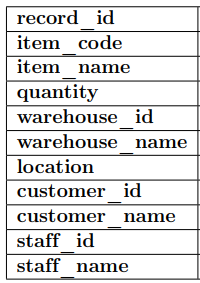

## Câu 1. Xác định khóa chính của bảng StorageRecords_Raw.
### Answer:
- Khóa chính của bảng là `record_id`

## Câu 2. Phân tích các vi phạm chuẩn hoá:
- Bảng trên đã đạt chuẩn 1NF chưa? Nếu chưa, cần điều chỉnh gì?
- Có thuộc tính nào vi phạm 2NF không? Nếu có, là những thuộc tính nào?
- Có thuộc tính nào vi phạm 3NF không? Nếu có, là những thuộc tính nào và vì
sao?
### Answer:
- Bảng trên đã đạt chuẩn 1NF
- Có thuộc tính nào vi phạm 2NF:
  - khóa chính là (`record_id`, `item_code`, `warehouse_id`, `customer_id`, `staff_id`)
  - `item_name` chỉ phụ thuộc vào `item_code`
  - `warehouse_name` chỉ phụ thuộc vào `warehouse_id`
  - `customer_name` chỉ phụ thuộc vào `customer_id`
  - `staff_name` chỉ phụ thuộc vào `staff_id`
    -> vi phạm 2NF
- Không có thuộc tính vi phạm 3NF

## Câu 3. Thực hiện chuẩn hóa đến 3NF:
- Trình bày các bảng sau khi chuẩn hóa.
- Ghi rõ khóa chính và khóa ngoại (nếu có) cho từng bảng.
- Tối thiểu có 4 bảng, khuyến khích thiết kế 5 bảng.
### Answer:
- Bảng sau khi chuẩn hóa được chia làm 5 bảng: `items`, `warehouses`, `customers`, `staff`, `records`
- Bảng `items`:
  - item_code VARCHAR(20) PRIMARY KEY,
  - item_name VARCHAR(100) NOT NULL
- Bảng `warehouses`:
  - warehouse_id VARCHAR(20) PRIMARY KEY,
  - warehouse_name VARCHAR(100) NOT NULL
- Bảng `customers`:
  - customer_id VARCHAR(20) PRIMARY KEY,
  - customer_name VARCHAR(100) NOT NULL
- Bảng `staffs`:
  - staff_id VARCHAR(20) PRIMARY KEY,
  - staff_name VARCHAR(100) NOT NULL
- Bảng `records`:
  - record_id VARCHAR(20) PRIMARY KEY,
  - item_code VARCHAR(20),
  - quantity INT NOT NULL,
  - warehouse_id VARCHAR(20),
  - location VARCHAR(100) NOT NULL,
  - customer_id VARCHAR(20),
  - staff_id VARCHAR(20),
  - FOREIGN KEY (item_code) REFERENCES items(item_code) ON DELETE CASCADE,
  - FOREIGN KEY (warehouse_id) REFERENCES warehouses(warehouse_id) ON DELETE CASCADE,
  - FOREIGN KEY (customer_id) REFERENCES customers(customer_id) ON DELETE CASCADE,
  - FOREIGN KEY (staff_id) REFERENCES staffs(staff_id) ON DELETE CASCADE
  

## Câu 4. Thiết kế mô hình dữ liệu (mô tả dạng bảng hoặc sơ đồ ERD nếu có thể).Sau khi chuẩn hóa, hãy viết truy vấn SQL (hoặc mô tả logic truy vấn) cho các yêu cầu sau:
- 4.1. Liệt kê tổng số lượng từng loại hàng hóa đang lưu trong từng kho.
- 4.2. Tìm tên khách hàng và các mặt hàng họ đã gửi kho.
- 4.3. Liệt kê danh sách nhân viên đang phụ trách các lô hàng lưu trữ tại kho có tên là “Main
Warehouse”.
- 4.4. Tìm vị trí (location) lưu trữ của từng mặt hàng trong từng kho.
- 4.5. Đếm số khách hàng khác nhau đang gửi hàng tại mỗi kho.


In [1]:
import pymysql
import os
from dotenv import load_dotenv

# Load environment variables from .credential file
load_dotenv("../../w7/.credential")

# Get credentials from environment variables
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)
cursor = conn.cursor()


In [2]:
cursor.execute("CREATE DATABASE IF NOT EXISTS w9db;")
cursor.execute("USE w9db;")

# 1. Tạo bảng items
cursor.execute("""
CREATE TABLE IF NOT EXISTS items (
    item_code VARCHAR(20) PRIMARY KEY,
    item_name VARCHAR(100) NOT NULL
);
""")

# 2. Tạo bảng warehouses
cursor.execute("""
CREATE TABLE IF NOT EXISTS warehouses (
    warehouse_id VARCHAR(20) PRIMARY KEY,
    warehouse_name VARCHAR(100) NOT NULL
);
""")

# 3. Tạo bảng customers
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    customer_id VARCHAR(20) PRIMARY KEY,
    customer_name VARCHAR(100) NOT NULL
);
""")

# 4. Tạo bảng staffs
cursor.execute("""
CREATE TABLE IF NOT EXISTS staffs (
    staff_id VARCHAR(20) PRIMARY KEY,
    staff_name VARCHAR(100) NOT NULL
);
""")

# 5. Tạo bảng records
cursor.execute("""
CREATE TABLE IF NOT EXISTS records (
    record_id VARCHAR(20) PRIMARY KEY,
    item_code VARCHAR(20),
    quantity INT NOT NULL,
    warehouse_id VARCHAR(20),
    location VARCHAR(100) NOT NULL,
    customer_id VARCHAR(20),
    staff_id VARCHAR(20),
    FOREIGN KEY (item_code) REFERENCES items(item_code) ON DELETE CASCADE,
    FOREIGN KEY (warehouse_id) REFERENCES warehouses(warehouse_id) ON DELETE CASCADE,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id) ON DELETE CASCADE,
    FOREIGN KEY (staff_id) REFERENCES staffs(staff_id) ON DELETE CASCADE
);
""")

# Thêm dữ liệu vào bảng items
cursor.execute("""
INSERT INTO items (item_code, item_name) VALUES
('IT001', 'Motor Oil 5L'),
('IT002', 'Brake Fluid 1L'),
('IT003', 'Battery 12V'),
('IT004', 'Tire 17 inch')
;
""")

# Thêm dữ liệu vào bảng warehouses
cursor.execute("""
INSERT INTO warehouses (warehouse_id, warehouse_name) VALUES
('WH01', 'Main Warehouse'),
('WH02', 'North Depot'),
('WH03', 'South Branch')
;
""")

# Thêm dữ liệu vào bảng customers
cursor.execute("""
INSERT INTO customers (customer_id, customer_name) VALUES
('C001', 'Mekong Corp'),
('C002', 'Thien Long Co'),
('C003', 'Delta Co'),
('C004', 'Vina Trading')
;
""")

# Thêm dữ liệu vào bảng staffs
cursor.execute("""
INSERT INTO staffs (staff_id, staff_name) VALUES
('S01', 'Hoa Nguyen'),
('S02', 'Khang Tran'),
('S03', 'Lan Pham'),
('S04', 'Tuan Le')
;
""")

# Thêm dữ liệu vào bảng records
cursor.execute("""
INSERT INTO records (record_id, item_code, quantity, warehouse_id, location, customer_id, staff_id) VALUES
('R001', 'IT001', 50, 'WH01', 'Shelf A1', 'C001', 'S01'),
('R002', 'IT002', 100, 'WH01', 'Shelf A2', 'C002', 'S02'),
('R003', 'IT001', 40, 'WH02', 'Shelf C3', 'C001', 'S01'),
('R004', 'IT003', 25, 'WH01', 'Shelf B1', 'C003', 'S02'),
('R005', 'IT004', 10, 'WH03', 'Shelf D1', 'C004', 'S03')
;
""")

# Commit the changes
conn.commit()

In [3]:
# 4.1. Liệt kê tổng số lượng từng loại hàng hóa đang lưu trong từng kho.

cursor.execute("""
SELECT i.item_name, sum(r.quantity)
    AS  total_quantity
FROM items i
INNER JOIN records r
    ON i.item_code = r.item_code
GROUP BY i.item_name;
""")

data = cursor.fetchall()
print(data)

(('Motor Oil 5L', Decimal('90')), ('Brake Fluid 1L', Decimal('100')), ('Battery 12V', Decimal('25')), ('Tire 17 inch', Decimal('10')))


In [4]:
# 4.2. Tìm tên khách hàng và các mặt hàng họ đã gửi kho.

cursor.execute("""
SELECT c.customer_name, i.item_name
FROM items i
INNER JOIN records r
    ON i.item_code = r.item_code
INNER JOIN customers c
    ON c.customer_id = r.customer_id;
""")

data = cursor.fetchall()
print(data)

(('Mekong Corp', 'Motor Oil 5L'), ('Mekong Corp', 'Motor Oil 5L'), ('Thien Long Co', 'Brake Fluid 1L'), ('Delta Co', 'Battery 12V'), ('Vina Trading', 'Tire 17 inch'))


In [6]:
# 4.3. Liệt kê danh sách nhân viên đang phụ trách các lô hàng lưu trữ tại kho có tên là “Main Warehouse”.

cursor.execute("""
SELECT s.staff_name 
    AS staff_for_main_warehouse
FROM staffs s
INNER JOIN records r
    ON s.staff_id = r.staff_id
INNER JOIN warehouses w
    ON w.warehouse_id = r.warehouse_id
WHERE w.warehouse_name 
    LIKE "Main Warehouse"
GROUP BY staff_for_main_warehouse;          
""")

data = cursor.fetchall()
print(data)

(('Hoa Nguyen',), ('Khang Tran',))


In [7]:
# 4.4. Tìm vị trí (location) lưu trữ của từng mặt hàng trong từng kho.

cursor.execute("""
SELECT i.item_name, r.location, w.warehouse_name 
FROM items i
INNER JOIN records r
    ON i.item_code = r.item_code
INNER JOIN warehouses w
    ON w.warehouse_id = r.warehouse_id;
""")

data = cursor.fetchall()
print(data)

(('Motor Oil 5L', 'Shelf A1', 'Main Warehouse'), ('Brake Fluid 1L', 'Shelf A2', 'Main Warehouse'), ('Battery 12V', 'Shelf B1', 'Main Warehouse'), ('Motor Oil 5L', 'Shelf C3', 'North Depot'), ('Tire 17 inch', 'Shelf D1', 'South Branch'))


In [8]:
# 4.5. Đếm số khách hàng khác nhau đang gửi hàng tại mỗi kho.

cursor.execute("""
SELECT count(c.customer_name) 
    AS customer_count, w.warehouse_name
FROM customers c
INNER JOIN records r
    ON c.customer_id = r.customer_id
INNER JOIN warehouses w
    ON w.warehouse_id = r.warehouse_id
GROUP BY w.warehouse_name;
""")

data = cursor.fetchall()
print(data)

((3, 'Main Warehouse'), (1, 'North Depot'), (1, 'South Branch'))


In [9]:
# Close Connection
cursor.close()
conn.close()